# **Aim**: Find out medical item which are stocking out the most and the ward on which those stockouts are occurring

Google Colab was used for this project.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install category_encoders #install libraries for category encoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import the data
from google.colab import drive #data is uploaded into google drive for convenience
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dictionary=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/data_dictionary.xlsx')
data_dictionary

,table_name,table_description,column,column_description
0,hospital,Hospital site transactional information.,technical_id,internal table ID
1,hospital,Hospital site transactional information.,hospital_id,internal hospital ID
2,hospital,Hospital site transactional information.,hospital_abbreviation,abbreviated hospital ID name
3,hospital,Hospital site transactional information.,hospital_name,Name of hospital
4,hospital_ward,Ward area transactional information for each h...,technical_id,internal table ID
5,hospital_ward,Ward area transactional information for each h...,hospital_ward_id,internal hospital ward ID
6,hospital_ward,Ward area transactional information for each h...,hospital_ward_name,hospital ward name
7,hospital_ward,Ward area transactional information for each h...,hospital_abbreviation,abbreviated hospital ID name
8,machine,Machine (automated cabinet) transactional info...,technical_id,internal table ID
9,machine,Machine (automated cabinet) transactional info...,omnicell_machine_id,internal machine ID


In [ ]:
hospital_ward=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/hospital_ward.xlsx')
hospital_ward

,technical_id,hospital_ward_id,hospital_ward_name,hospital_abbreviation
0,1,4,JOINT,SV
1,2,5,6W,SV
2,3,12,OR,SV
3,4,15,ONCOLOGY,SV
4,5,18,CICU12,SV
5,6,24,NICU,SV
6,7,25,BP,SV
7,8,29,CATHLAB,SV
8,9,30,CVOPC,SV
9,10,32,VN,SV


In [ ]:
hospital=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/hospital.xlsx')
hospital

,technical_id,hospital_id,hospital_abbreviation,hospital_name
0,1,2,SV,Stamford-Vale
1,2,597549,ST,Stafford Tyne


In [ ]:
machine=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/machine.xlsx')
machine

,technical_id,omnicell_machine_id,machine_identifier,machine_name,machine_type,hospital_abbreviation
0,1,4,SVJOINT1,JOINT1 (ORTHO),CTS,SV
1,2,6,SV6W,6W,CTS,SV
2,3,12,SVOR3,OR 3,CTS,SV
3,4,16,SVONCOLOGY,Oncology,CTS,SV
4,5,19,SVCICU2,CICU2,CTS,SV
...,...,...,...,...,...,...
97,98,646307,SV880002,Internal Medicine - 880002,REMOTE,SV
98,99,646308,SVSDS,Remote Order Single Day Surgery,REMOTE,SV
99,100,646309,SV880000,Family Practice - 901 - 880000,REMOTE,SV
100,101,646314,SVICU,PAV Intensive Care 1,STKRM,SV


In [ ]:
medication=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/medication.xlsx')
medication

,technical_id,machine_identifier,medication_id,medication_detail_id,medication,medication_unit,medication_unit_cost
0,1,SVJOINT1,969384,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.000
1,2,SVANES,969403,PRO200E,propofol (D 10mg/1ml 20ml ampule,AMP,0.000
2,3,SVANES,969407,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.000
3,4,SVANES,969408,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.000
4,5,SV7E,969434,OXY5TI,oxyCODONE IR (ROXICOD 5mg tablet,TAB,0.000
...,...,...,...,...,...,...,...
41018,41019,SVICU,1064447,MOR10I,morphine 10mg/1ml 1ml vial,VIAL,0.914
41019,41020,SVICU,1064448,MOR10I,morphine 10mg/1ml 1ml vial,VIAL,0.914
41020,41021,SVICU,1064449,MOR10I,morphine 10mg/1ml 1ml vial,VIAL,0.914
41021,41022,SVICU,1064450,MOR10I,morphine 10mg/1ml 1ml vial,VIAL,0.914


In [ ]:
nurse=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/nurse.xlsx')
nurse

,technical_id,nurse_id,user_type,user_name
0,1,2732,NURSE,MADALINE SHOVE
1,2,2824,ANESTHESIA,JOVAN PLUMP
2,3,4081,NURSE,AMY TREAGER
3,4,651763,NURSE,BETSEY LIPSIE
4,5,651849,NURSE,FRANCINE HOCHSTATTER
...,...,...,...,...
1626,1627,656051,OMNITECH,PERLA ASARO
1627,1628,656053,OMNITECH,Omnitech Test
1628,1629,656054,OMNITECH,omrp
1629,1630,656055,OMNITECH,Omnicell John Doe


In [ ]:
patient=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/patient.xlsx')
patient

,technical_id,patient_id,patient_identifier_number,patient_type
0,1,0,NaN,NaN
1,2,1986300,3.725978e+09,INP
2,3,2017288,9.361677e+09,INP
3,4,2036474,4.343004e+08,INP
4,5,2061316,9.313283e+09,INP
...,...,...,...,...
995,996,2136107,1.527546e+09,OP1
996,997,2136108,5.096541e+09,INP
997,998,2136109,2.980218e+09,INP
998,999,2136110,5.096519e+09,OP1


In [ ]:

restock=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/restock.xlsx')
restock

,technical_id,restock_id,restock_number,restock_route,destination_ward,destination_hospital
0,1,0,NaN,NaN,NaN,NaN
1,2,1390804,CPC01-0097740.00,Surgery Refill Mornin CP,NaN,NaN
2,3,1391470,CPC01-0097762.00,Surgery Refill Afterno CP,NaN,NaN
3,4,1391484,CPC01-0097761.00,Surgery Refill PM NARCS,NaN,NaN
4,5,1391660,CPC01-0097768.00,NaN,NaN,NaN
...,...,...,...,...,...,...
995,996,1393142,209000,Dispense from INV,CICU12,SV
996,997,1393143,209000,Dispense from INV,CICU12,SV
997,998,1393144,VLT01-0000078594,Dispense from SVNARCOTIC,_RX,SV
998,999,1393145,209002,Dispense from INV,4W SPINE,SV


In [ ]:
transaction_type=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/transaction_type.xlsx')
transaction_type

,technical_id,transaction_type,transaction_type_action
0,1,A,Inactive Access
1,2,B,Bedside
2,3,C,Cycle Count
3,4,D,Discrepancy
4,5,E,Emergency
5,6,F,Dispensing Error
6,7,G,Pick
7,8,I,Issue
8,9,K,Destock
9,10,L,Receive


In [ ]:
transaction=pd.read_excel('/content/gdrive/MyDrive/TechnicalExercise/transaction.xlsx')
transaction

,transaction_id,datetime,transaction_type,hospital_id,hospital_ward_id,omnicell_machine_id,nurse_id,patient_id,medication_id,transaction_quantity,quantity_on_hand,restock_id
0,1,2022101800055550,V,2,43,646284,655065,0,997741,0.0,46,1508931
1,2,2025101800071300,R,2,62,100,654492,2207026,1025890,-2.0,9,0
2,3,2022101800071800,I,2,58,646282,654805,2203789,1022831,1.0,13,0
3,4,2022101800073000,I,2,4,70,654127,2206842,1036923,1.0,2,0
4,5,2022101800073200,I,2,82,45,655632,2207163,1038449,4.0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2022101815185540,G,2,43,646284,655619,0,1009079,10.0,22,1509889
996,997,2022101815185540,V,2,43,646284,655619,0,997073,10.0,22,1509889
997,998,2022101815191190,G,2,43,646284,655619,0,1009080,15.0,25,1509889
998,999,2022101815190400,I,2,12,43,653958,2207873,972645,4.0,10,0


#Preprocessing

check for duplicate rows and empty rows


In [ ]:
#Create copy
hospital_ward1=hospital_ward.copy()
hospital1=hospital.copy()
machine1=machine.copy()
medication1=medication.copy()
nurse1=nurse.copy()
patient1=patient.copy()
restock1=restock.copy()
transaction_type1=transaction_type.copy()
transaction1=transaction.copy()


In [ ]:
hospital_ward1.head()

,technical_id,hospital_ward_id,hospital_ward_name,hospital_abbreviation
0,1,4,JOINT,SV
1,2,5,6W,SV
2,3,12,OR,SV
3,4,15,ONCOLOGY,SV
4,5,18,CICU12,SV


In [ ]:
transaction1.head()

,transaction_id,datetime,transaction_type,hospital_id,hospital_ward_id,omnicell_machine_id,nurse_id,patient_id,medication_id,transaction_quantity,quantity_on_hand,restock_id
0,1,2022101800055550,V,2,43,646284,655065,0,997741,0.0,46,1508931
1,2,2025101800071300,R,2,62,100,654492,2207026,1025890,-2.0,9,0
2,3,2022101800071800,I,2,58,646282,654805,2203789,1022831,1.0,13,0
3,4,2022101800073000,I,2,4,70,654127,2206842,1036923,1.0,2,0
4,5,2022101800073200,I,2,82,45,655632,2207163,1038449,4.0,11,0


In [ ]:
#Drop technical_id


#technical_id column of machine, hospital,hospital_ward,nurse,patient and transaction_type table can be considered as the index of the table. No much importance giving to the table.

#similarly transaction_id in transaction table can be considered as the index. droping transaction_id of the transaction table
hospital_ward1=hospital_ward1.drop('technical_id',axis=1)
hospital1=hospital1.drop('technical_id',axis=1)
machine1=machine1.drop('technical_id',axis=1)
medication1=medication1.drop('technical_id',axis=1)
nurse1=nurse1.drop('technical_id',axis=1)
patient1=patient1.drop('technical_id',axis=1)
restock1=restock1.drop('technical_id',axis=1)
transaction_type1=transaction_type1.drop('technical_id',axis=1)
transaction1=transaction1.drop('transaction_id',axis=1)

In [ ]:
print('hospital ward \n',hospital_ward1.head(5),'\n \n')
print('hospital \n',hospital1,'\n \n')
print('machine \n',machine1.head(5),'\n \n')
print('medication \n',medication1.head(5),'\n \n')
print('nurse \n',nurse1.head(5),'\n \n')
print('patient \n',patient1.head(5),'\n \n')
print('restock \n',restock1.head(5),'\n \n')
print('transaction type \n',transaction_type1.head(5),'\n \n')
print('transaction \n',transaction1.head(5),'\n \n')

hospital ward 
    hospital_ward_id hospital_ward_name hospital_abbreviation
0                 4              JOINT                    SV
1                 5                 6W                    SV
2                12                 OR                    SV
3                15           ONCOLOGY                    SV
4                18             CICU12                    SV 
 

hospital 
    hospital_id hospital_abbreviation  hospital_name
0            2                    SV  Stamford-Vale
1       597549                    ST  Stafford Tyne 
 

machine 
    omnicell_machine_id machine_identifier    machine_name machine_type  \
0                    4           SVJOINT1  JOINT1 (ORTHO)          CTS   
1                    6               SV6W              6W          CTS   
2                   12              SVOR3            OR 3          CTS   
3                   16         SVONCOLOGY        Oncology          CTS   
4                   19            SVCICU2           CICU2      

In [ ]:
#find the null or empty rows and remove it
print(hospital_ward1.isnull().sum())
#There are two null values in column hospital_ward_name and hospital_abbreviation. drop the row
hospital_ward1=hospital_ward1.dropna()
print('\n',hospital_ward1.isnull().sum())

hospital_ward_id         0
hospital_ward_name       1
hospital_abbreviation    1
dtype: int64

 hospital_ward_id         0
hospital_ward_name       0
hospital_abbreviation    0
dtype: int64


In [ ]:
print(machine1.isnull().sum())
print(machine1.shape)
machine1=machine1.dropna()
print(machine1.isnull().sum())
#two empty rows in machine_name and 1 null value in machine_type. droping it


omnicell_machine_id      0
machine_identifier       2
machine_name             1
machine_type             0
hospital_abbreviation    0
dtype: int64
(102, 5)
omnicell_machine_id      0
machine_identifier       0
machine_name             0
machine_type             0
hospital_abbreviation    0
dtype: int64


In [ ]:
medication1.head()

,machine_identifier,medication_id,medication_detail_id,medication,medication_unit,medication_unit_cost
0,SVJOINT1,969384,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0
1,SVANES,969403,PRO200E,propofol (D 10mg/1ml 20ml ampule,AMP,0.0
2,SVANES,969407,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0
3,SVANES,969408,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0
4,SV7E,969434,OXY5TI,oxyCODONE IR (ROXICOD 5mg tablet,TAB,0.0


In [ ]:
print(medication1.isnull().sum())
print(medication1.shape)
#There are 1092 null values in medication_unit, 47 null values  in medication, and 3 null values in machine_identifier. So removing that many rows may affect the table, because total lenght of the table is only 41023.
#check the contribution of medication unit from the data dictionary table.
print('\n Medication Unit: ',data_dictionary.iloc[19,3]) # iloc[19,3] means 19th row and 3rd column
#medication dispensed or issued not available for some of the items so remvoing those row's
#removing all empty rows
medication1=medication1.dropna()
print('size of the table after removing empty row"s \n',medication1.shape,)

#table length reduced to 39926 from 41023

machine_identifier         3
medication_id              0
medication_detail_id       0
medication                47
medication_unit         1092
medication_unit_cost       0
dtype: int64
(41023, 6)

 Medication Unit:  the unit in which the medication is dispensed/issued
size of the table after removing empty row"s 
 (39926, 6)


In [ ]:
print(nurse1.isnull().sum())
print(nurse1.shape)
nurse1=nurse1.dropna()

nurse_id     0
user_type    3
user_name    2
dtype: int64
(1631, 3)


In [ ]:
print(patient1.isnull().sum())
print(patient1.shape)
patient1=patient1.dropna()

patient_id                   0
patient_identifier_number    1
patient_type                 8
dtype: int64
(1000, 3)


In [ ]:
print(restock1.isnull().sum())
print(restock1.shape)
restock1=restock1.dropna()
print(restock1.shape)

restock_id                0
restock_number           72
restock_route           124
destination_ward        140
destination_hospital    140
dtype: int64
(1000, 5)
(819, 5)


In [ ]:
print(transaction_type1.isnull().sum())
print(transaction_type1.shape)
#no empty rows

transaction_type           0
transaction_type_action    0
dtype: int64
(23, 2)


In [ ]:
print(transaction1.isnull().sum())
print(transaction1.shape)
#no empty rows

datetime                0
transaction_type        0
hospital_id             0
hospital_ward_id        0
omnicell_machine_id     0
nurse_id                0
patient_id              0
medication_id           0
transaction_quantity    0
quantity_on_hand        0
restock_id              0
dtype: int64
(1000, 11)


In [ ]:
#Find the zeros which is not valid and remove it
print('zeros in hospital ward table \n',(hospital_ward1==0).sum(),'\n')
print('zeros in medication table \n',(medication1==0).sum(),'\n')
print('zeros in machine table \n',(machine1==0).sum(),'\n')
print('zeros in nurse table \n',(nurse1==0).sum(),'\n')
print('zeros in patient table \n',(patient1==0).sum(),'\n')
print('zeros in transaction type \n',(transaction_type1==0).sum(),'\n')
print('zeros in tranascation \n',(transaction1==0).sum(),'\n')

#medication_unit_cost has 32422 zero's. It is the cost of the medicine. It can be zero and can be considered as free of cost.

zeros in hospital ward table 
 hospital_ward_id         0
hospital_ward_name       0
hospital_abbreviation    0
dtype: int64 

zeros in medication table 
 machine_identifier          0
medication_id               0
medication_detail_id        0
medication                  0
medication_unit             0
medication_unit_cost    32422
dtype: int64 

zeros in machine table 
 omnicell_machine_id      0
machine_identifier       0
machine_name             0
machine_type             0
hospital_abbreviation    0
dtype: int64 

zeros in nurse table 
 nurse_id     0
user_type    0
user_name    0
dtype: int64 

zeros in patient table 
 patient_id                   0
patient_identifier_number    0
patient_type                 0
dtype: int64 

zeros in transaction type 
 transaction_type           0
transaction_type_action    0
dtype: int64 

zeros in tranascation 
 datetime                  0
transaction_type          0
hospital_id               0
hospital_ward_id          0
omnicell_machine_id   


*   **quantity_on_hand** has 76 zeros. As per the task a stockout is defined as when the total quantity of the item in the ward equals 0.

Lets compare the data_dictionary to find which column gives the stockout data.

**quantity_on_hand**: "is the quantity of the item in the machine at the time of transaction after it occured". which means it is the current stock column.

So there are **76 stockout medicines** item

*   **patient_id** has 315 zeros. patient_id cant be zero because it is the id of a patient who took the medication. A patient can have different patient_id, from the patient table it is clear that, patient_id is more like the entry of patient who took medication at different times and patient_identifier_number is the unique patient number.

A patient_id =0 means no medication taken by the patient which contradicts rest of the column. which is wrong. so removing patient_id column instead the rows where patient_id equals zero.

*   **transaction_quantity**  has 77 zeros. transation_quantity is the quantity issued. +ve transaction = taken from the machine, and -ve transaction = put in back to the machine. so probably transaction_quantity =0  means no transaction. so cant remove that.

*   **restock_id** has the most zeros that is 694. so when comparing with restock_id of restock table it doest match as well. so removing the restock_id column instead of rows.


In [ ]:
print(data_dictionary.iloc[45])
print('\n Hospital ID: ',transaction1['hospital_id'].value_counts())
# hospital ID is same for all the rows and confirm the transaction table is all based on hospital Stamford-Vale
transaction1=transaction1.drop(['restock_id','patient_id','hospital_id'],axis=1) #hospital_id is same for every transaction. which is same hospital


table_name                                                  transaction
table_description     All machine transaction information. These are...
column                                                 quantity_on_hand
column_description    quantity on hand in the machine at the time of...
Name: 45, dtype: object

 Hospital ID:  2    1000
Name: hospital_id, dtype: int64


In [ ]:
#check for duplicates
print('Hospital Ward :',hospital_ward1.duplicated().sum())
print('Machine :',machine1.duplicated().sum())
print('Patient :',patient1.duplicated().sum())
print('Nurse :',nurse1.duplicated().sum())
print('restock :',restock1.duplicated().sum())
print('transaction :',transaction1.duplicated().sum())
#there are 5 duplicates in transaction data. drop it

Hospital Ward : 0
Machine : 0
Patient : 0
Nurse : 0
restock : 0
transaction : 5


In [ ]:
transaction1=transaction1.drop_duplicates()
transaction1

,datetime,transaction_type,hospital_ward_id,omnicell_machine_id,nurse_id,medication_id,transaction_quantity,quantity_on_hand
0,2022101800055550,V,43,646284,655065,997741,0.0,46
1,2025101800071300,R,62,100,654492,1025890,-2.0,9
2,2022101800071800,I,58,646282,654805,1022831,1.0,13
3,2022101800073000,I,4,70,654127,1036923,1.0,2
4,2022101800073200,I,82,45,655632,1038449,4.0,11
...,...,...,...,...,...,...,...,...
995,2022101815185540,G,43,646284,655619,1009079,10.0,22
996,2022101815185540,V,43,646284,655619,997073,10.0,22
997,2022101815191190,G,43,646284,655619,1009080,15.0,25
998,2022101815190400,I,12,43,653958,972645,4.0,10


#Exploratory Data Analysis

Dispense from INV            591
Dispense from SV1CP_MAIN      39
Fill - DAY South Tower        34
Fill - DAY Pavillion          23
Dispense from SVNARCOTIC      21
Surgery Refill Mornin CP      20
Surgery Refill Afterno CP     18
Fill - DAY North Tower        15
Fill - IV Fluids  C/L         10
Dispense from STCP_KIT         8
Narc Fill -NIGHT               7
Refill VAIL Omnis              6
Narc Fill - AM - SOUTH         6
Special (By Item)              4
Narc Fill - AM - PAV           4
Surg Refill Main RX MEDS       4
Narc Fill - AM - North         3
Dispense from SVCP_OR          2
1-Fill ST  CP_KIT from CP      2
1-Fill CP_OR from CPMAIN       2
Name: restock_route, dtype: int64


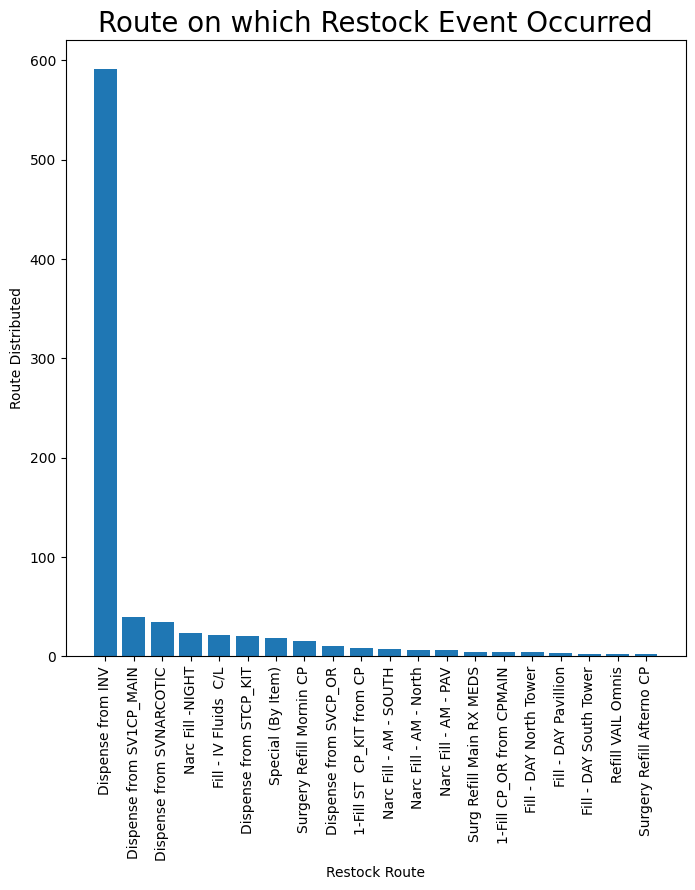

In [ ]:
#Visualising restock table. Find the route on which restock event occured most and least.
print(restock1['restock_route'].value_counts())
plt.figure(figsize=(8,8))
plt.bar(restock1['restock_route'].unique(),restock1['restock_route'].value_counts())
plt.xticks(rotation = 90)
plt.title('Route on which Restock Event Occurred',fontsize=20)
plt.ylabel('Route Distributed')
plt.xlabel('Restock Route')
plt.show()

From the above bar chart of Restock Route vs Route Distribution (Even occurred). It is clear that most of the times it is Dispense from INV and least is Surgery Refill Afterno CP.

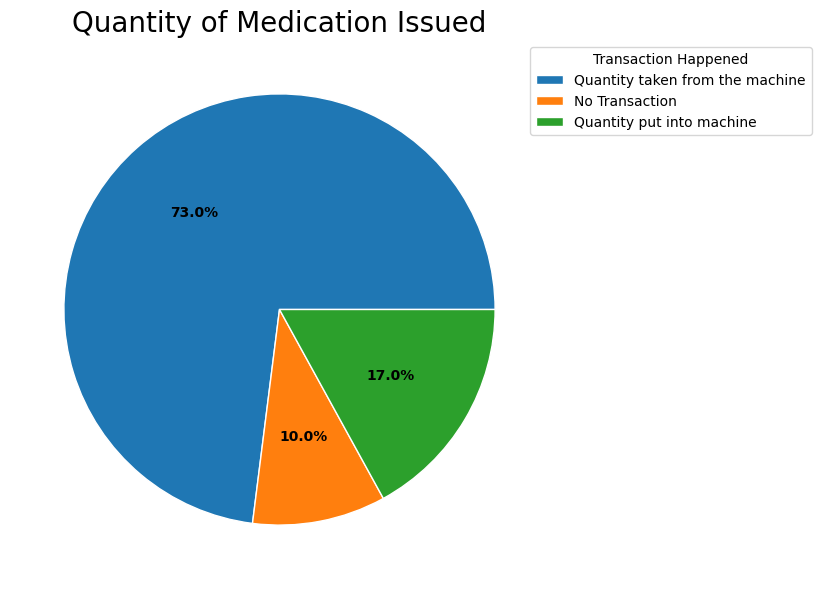

In [ ]:

#Visualisation of transaction taken place : taken from machine, put into machine, and no transactions from transaction table
a=0
b=0
c=0
length=len(transaction1)-1
for x in range(100):
  if (transaction1['transaction_quantity'][x]==0):
    a=a+1
  elif (transaction1['transaction_quantity'][x]>0):
    b=b+1
  else:
    c=c+1
xpos=[b,a,c]
ypos=['Quantity taken from the machine','No Transaction','Quantity put into machine']
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(xpos, autopct = '%.1f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})

ax.legend(wedges, ypos,
          title ="Transaction Happened",
          loc ="upper right",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Quantity of Medication Issued",fontsize=20)
plt.show()


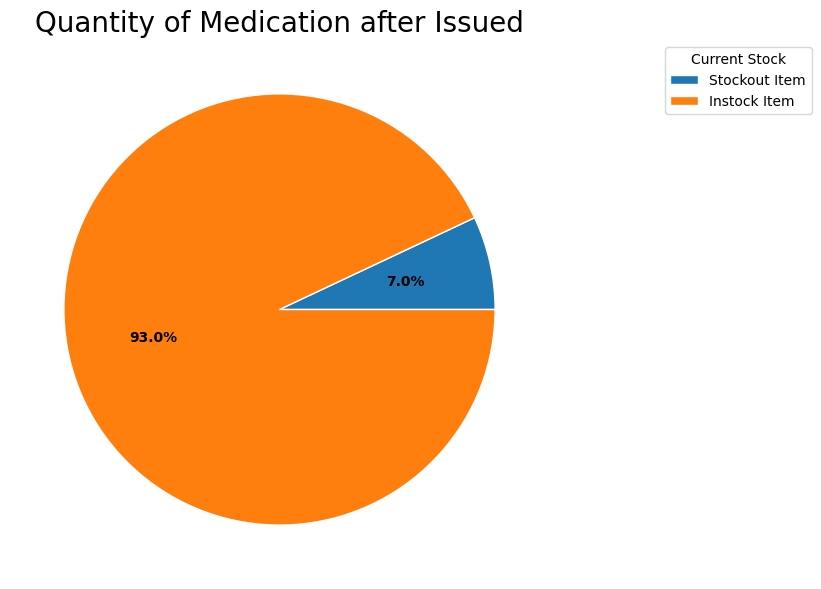

In [ ]:
#Visualising current stock from quantity_on_hand of transaction table
a=0
b=0
length=len(transaction1)-1
for x in range(100):
  if (transaction1['quantity_on_hand'][x]==0):
    a=a+1
  else:
    b=b+1
xpos=[a,b]
ypos=['Stockout Item','Instock Item']
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(xpos, autopct = '%.1f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})

ax.legend(wedges, ypos,
          title ="Current Stock",
          loc ="upper right",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Quantity of Medication after Issued",fontsize=20)
plt.show()
#7% items are stockout

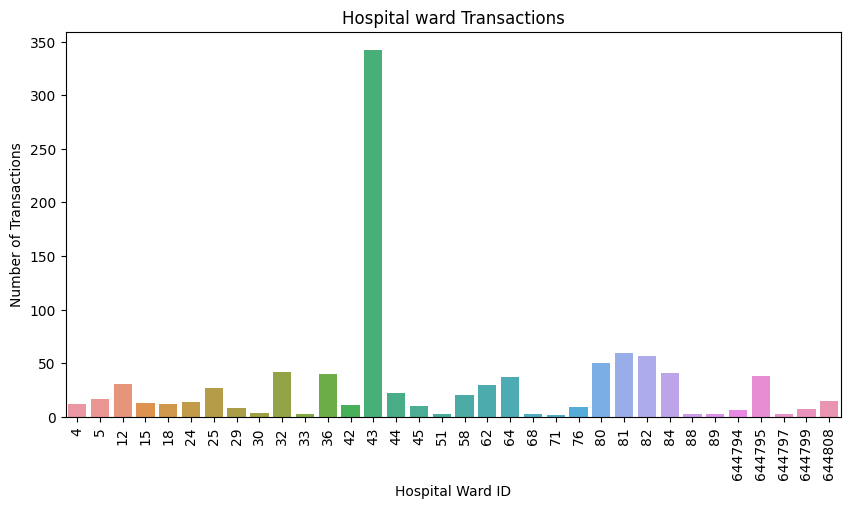

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="hospital_ward_id", data=transaction1) #Stockout at largest is happening at hospital ward 43
plt.title('Hospital ward Transactions')
plt.xlabel('Hospital Ward ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

#Most of the transaction has taken place in ward 43 and least 71

In [ ]:
transaction1['transaction_type'].value_counts()

I     531
V     139
G     135
N      34
K      25
C      22
W      19
R      19
D      18
L      13
S      13
U       9
O       8
X       5
 W      1
M       1
 V      1
G       1
V       1
Name: transaction_type, dtype: int64

#Modeling

medication table give the item data and transaction table gives the current stock of the item. so merging both table based on medication_id.

Out_of_Stock is column initialised to 0 for next step

In [ ]:
medical_transaction=pd.merge(medication1,transaction1,on='medication_id',how='inner')
medical_transaction['Out_of_Stock']=0 #initialising a column
medical_transaction
#while processing the data I found that w and v has space in the beginning in transaction_type column. So removing the space
medical_transaction['transaction_type'] = medical_transaction['transaction_type'].str.replace(' ', '')

medical_transaction

,machine_identifier,medication_id,medication_detail_id,medication,medication_unit,medication_unit_cost,datetime,transaction_type,hospital_ward_id,omnicell_machine_id,nurse_id,transaction_quantity,quantity_on_hand,Out_of_Stock
0,SVSPINE4,969506,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,2022101808303300,I,644795,646280,653984,1.0,7,0
1,SVJOINT2,969668,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,2022101806013200,I,4,70,654127,1.0,20,0
2,SVOR14,969670,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,2022101807341400,I,12,47,655627,1.0,0,0
3,SVNARCOTIC,970015,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,2022101815182770,V,43,642879,654999,25.0,0,0
4,SVSTOP1,970839,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,2022101813204200,W,89,127,654299,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,SV1CP_MAIN,1045310,BUD.5M,budesonide 0.5mg/2ml 2ml nebule,NEB,0.0,2022101813212350,V,43,646284,655026,2.0,332,0
975,SVCP_OR,1045336,WAR5T,warfarin 5mg tablet,EA,0.0,2022101807294930,C,644799,646276,654991,80.0,80,0
976,SV3P2,1045340,OXC150T,OXcarbazepine 150mg tablet,EA,0.0,2022101807400000,I,62,101,655694,1.0,13,0
977,SVOR9,1045364,ROC10I5,rocuronium 10mg/1ml 5ml vial,VIAL,0.0,2022101813395600,W,12,58,655770,0.2,0,0


In [ ]:
#replace the 0 of out_of_stock column with the medication_detail_id wherever quantity_on_hand equals 0 (stockout)
med_tran_len=len(medical_transaction)-1
for x in range (med_tran_len):
  if medical_transaction['quantity_on_hand'][x]==0:
    medical_transaction['Out_of_Stock'][x]=medical_transaction['medication_detail_id'][x];
  else:
    medical_transaction['Out_of_Stock'][x]=0
medical_transaction

#We have Out_of_stock table with stockout item showing medication_detail_id and rest as 0

<ipython-input-146-9f240b9b0da7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_transaction['Out_of_Stock'][x]=0
<ipython-input-146-9f240b9b0da7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_transaction['Out_of_Stock'][x]=medical_transaction['medication_detail_id'][x];


,machine_identifier,medication_id,medication_detail_id,medication,medication_unit,medication_unit_cost,datetime,transaction_type,hospital_ward_id,omnicell_machine_id,nurse_id,transaction_quantity,quantity_on_hand,Out_of_Stock
0,SVSPINE4,969506,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,2022101808303300,I,644795,646280,653984,1.0,7,0
1,SVJOINT2,969668,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,2022101806013200,I,4,70,654127,1.0,20,0
2,SVOR14,969670,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,2022101807341400,I,12,47,655627,1.0,0,MID1I
3,SVNARCOTIC,970015,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,2022101815182770,V,43,642879,654999,25.0,0,34505
4,SVSTOP1,970839,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,2022101813204200,W,89,127,654299,1.0,0,MID1I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,SV1CP_MAIN,1045310,BUD.5M,budesonide 0.5mg/2ml 2ml nebule,NEB,0.0,2022101813212350,V,43,646284,655026,2.0,332,0
975,SVCP_OR,1045336,WAR5T,warfarin 5mg tablet,EA,0.0,2022101807294930,C,644799,646276,654991,80.0,80,0
976,SV3P2,1045340,OXC150T,OXcarbazepine 150mg tablet,EA,0.0,2022101807400000,I,62,101,655694,1.0,13,0
977,SVOR9,1045364,ROC10I5,rocuronium 10mg/1ml 5ml vial,VIAL,0.0,2022101813395600,W,12,58,655770,0.2,0,ROC10I5


In [ ]:
medical_transaction['Out_of_Stock'].value_counts() #
#920 medicines are in stock
#From the Out_of_Stock column it is clear that most repeated item is FEN50I2

0               920
FEN50I2          12
LOR2I             4
HYD2I             3
MOR.4L            3
AMPT10            2
CEF1I02           2
MID1I             2
OXY5TI            1
MET10T3           1
102431            1
LEV500IK          1
MOR1ID            1
ZOL10T            1
TRA50TU           1
CEF2PM            1
FEN50I2RFID       1
MOR20L            1
MOR1IS            1
115843            1
BAC100/500GU      1
FENBUP            1
HYDT10            1
BSSS              1
34505             1
BAC100GU          1
IGNORE40          1
PHE1.4L           1
OXY10I            1
TIO18MDI          1
OXY10I30          1
KET50IRFID        1
HYD1C             1
CAF20I            1
PHE.1IS           1
OND4T             1
ENO80IS           1
OND2I2            1
ROC10I5           1
Name: Out_of_Stock, dtype: int64

In [ ]:
#Encode the transaction_type colum.
from category_encoders import TargetEncoder
encoder = TargetEncoder()

#Here I am using Target Encoding because. transaction_type is the column which shows the kind of transaction happened and transaction_quantity is the quantity of transaction hapened
#So when I use traget encoding the encoded data will have the relation between both transaction_type and transaction_quantity

In [ ]:
medical_transaction['transaction_type_encoded'] = encoder.fit_transform(medical_transaction['transaction_type'], medical_transaction['transaction_quantity'])

In [ ]:
medical_transaction=medical_transaction.drop(['datetime','medication_id','omnicell_machine_id','machine_identifier','nurse_id'],axis=1)
medical_transaction #droping unnecessary columns 'datetime','medication_id','omnicell_machine_id','machine_identifier','nurse_id'

,medication_detail_id,medication,medication_unit,medication_unit_cost,transaction_type,hospital_ward_id,transaction_quantity,quantity_on_hand,Out_of_Stock,transaction_type_encoded
0,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,I,644795,1.0,7,0,1.190207
1,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,I,4,1.0,20,0,1.190207
2,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,I,12,1.0,0,MID1I,1.190207
3,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,V,43,25.0,0,34505,6.159375
4,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,W,89,1.0,0,MID1I,0.410785
...,...,...,...,...,...,...,...,...,...,...
974,BUD.5M,budesonide 0.5mg/2ml 2ml nebule,NEB,0.0,V,43,2.0,332,0,6.159375
975,WAR5T,warfarin 5mg tablet,EA,0.0,C,644799,80.0,80,0,22.805513
976,OXC150T,OXcarbazepine 150mg tablet,EA,0.0,I,62,1.0,13,0,1.190207
977,ROC10I5,rocuronium 10mg/1ml 5ml vial,VIAL,0.0,W,12,0.2,0,ROC10I5,0.410785


In [ ]:
#Exploring the medical_transaction table which has 0 transaction quantity
tran_len=len(medical_transaction)-1
for x in range (tran_len):
  if medical_transaction['transaction_quantity'][x]==0:
    print('\n')
    print(medical_transaction.loc[x])



medication_detail_id                                MET50TXL
medication                  metoprolol succinate 50mg tablet
medication_unit                                           EA
medication_unit_cost                                     0.0
transaction_type                                           N
hospital_ward_id                                          76
transaction_quantity                                     0.0
quantity_on_hand                                          22
Out_of_Stock                                               0
transaction_type_encoded                             0.05561
Name: 12, dtype: object


medication_detail_id                                    9D
medication                  0.9% sodium chloride 250ml bag
medication_unit                                        BAG
medication_unit_cost                                   0.0
transaction_type                                         V
hospital_ward_id                                        43
transact

In [ ]:
medical_transaction['Out_of_Stock']=medical_transaction['Out_of_Stock'].apply(str) #Out_of_Stock column has both int and string so converting everything to str

# Label Encoding
from sklearn import preprocessing
lab=preprocessing.LabelEncoder()
medical_transaction['Out_of_Stock']=lab.fit_transform(medical_transaction['Out_of_Stock'])


In [ ]:
medical_transaction

,medication_detail_id,medication,medication_unit,medication_unit_cost,transaction_type,hospital_ward_id,transaction_quantity,quantity_on_hand,Out_of_Stock,transaction_type_encoded
0,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,I,644795,1.0,7,0,1.190207
1,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,I,4,1.0,20,0,1.190207
2,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,I,12,1.0,0,23,1.190207
3,34505,HYDROcodone/acetamino 1ea tablet,TAB,0.0,V,43,25.0,0,3,6.159375
4,MID1I,midazolam (VERS 2mg/2ml 2ml vial,VIAL,0.0,W,89,1.0,0,23,0.410785
...,...,...,...,...,...,...,...,...,...,...
974,BUD.5M,budesonide 0.5mg/2ml 2ml nebule,NEB,0.0,V,43,2.0,332,0,6.159375
975,WAR5T,warfarin 5mg tablet,EA,0.0,C,644799,80.0,80,0,22.805513
976,OXC150T,OXcarbazepine 150mg tablet,EA,0.0,I,62,1.0,13,0,1.190207
977,ROC10I5,rocuronium 10mg/1ml 5ml vial,VIAL,0.0,W,12,0.2,0,35,0.410785


Why I used label encoding?

I only need to define the Out_of_stock column with a numerical value. Overfitting could happen if I use target encoding. One-hot encoding will change the dataset's dimensionality. I decided on label encoding.

<ipython-input-154-25347b55111d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medical_transaction.corr(),annot=True)


<Axes: >

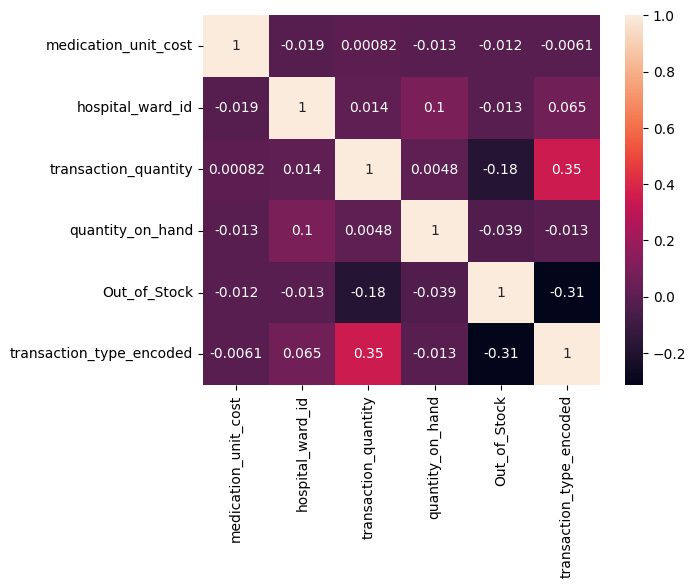

In [ ]:
sns.heatmap(medical_transaction.corr(),annot=True)

#the columns are not much correlated here. Only poitive correlation is the transaction_quantity vs transaction_type_encoded because of target encoding

In [ ]:
print(medical_transaction.duplicated().sum())
medical_transaction=medical_transaction.drop_duplicates()

13


#Modeling

In [ ]:
model=medical_transaction.drop(['medication_detail_id','medication','medication_unit','transaction_type'],axis=1)
#droping 'medication_detail_id','medication','medication_unit','transaction_type'

In [ ]:
print('duplicates :',model.duplicated().sum())
model=model.drop_duplicates()
model #data used to predict the stockout

duplicates : 101


,medication_unit_cost,hospital_ward_id,transaction_quantity,quantity_on_hand,Out_of_Stock,transaction_type_encoded
0,0.0,644795,1.0,7,0,1.190207
1,0.0,4,1.0,20,0,1.190207
2,0.0,12,1.0,0,23,1.190207
3,0.0,43,25.0,0,3,6.159375
4,0.0,89,1.0,0,23,0.410785
...,...,...,...,...,...,...
974,0.0,43,2.0,332,0,6.159375
975,0.0,644799,80.0,80,0,22.805513
976,0.0,62,1.0,13,0,1.190207
977,0.0,12,0.2,0,35,0.410785


In [ ]:
X_target=model.drop(['Out_of_Stock'],axis=1)
Y_target=model['Out_of_Stock']

In [ ]:
X_target

,medication_unit_cost,hospital_ward_id,transaction_quantity,quantity_on_hand,transaction_type_encoded
0,0.0,644795,1.0,7,1.190207
1,0.0,4,1.0,20,1.190207
2,0.0,12,1.0,0,1.190207
3,0.0,43,25.0,0,6.159375
4,0.0,89,1.0,0,0.410785
...,...,...,...,...,...
974,0.0,43,2.0,332,6.159375
975,0.0,644799,80.0,80,22.805513
976,0.0,62,1.0,13,1.190207
977,0.0,12,0.2,0,0.410785


In [ ]:
Y_target

0       0
1       0
2      23
3       3
4      23
       ..
974     0
975     0
976     0
977    35
978     0
Name: Out_of_Stock, Length: 865, dtype: int64

In [ ]:
np.random.seed(42) #set the random seed to 42. This ensures that the same split is used each time the code is run, which is important for reproducibility

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_target,Y_target, test_size=0.3,random_state=42)

#split the data with 70% for training and 30%for testing

In [ ]:
X_train

,medication_unit_cost,hospital_ward_id,transaction_quantity,quantity_on_hand,transaction_type_encoded
963,0.010,82,1.0,20,1.190207
209,0.000,82,-1.0,82819,-0.452277
304,0.000,43,2.0,209,6.135264
520,0.000,64,2.0,14,1.190207
541,0.386,43,2.0,132,6.159375
...,...,...,...,...,...
112,0.000,32,1.0,18,1.190207
294,0.000,43,16.0,163,6.135264
974,0.000,43,2.0,332,6.159375
480,0.000,62,-2.0,9,-0.452277


In [ ]:
#scaling the data using standardscaler.
#bring all the features to a similar scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.10061238, -0.25501451,  0.01008942, -0.17993377, -0.05905402],
       [-0.10097581, -0.25501451, -0.03033508,  0.42537393, -0.25575634],
       [-0.10097581, -0.25526695,  0.03030167, -0.17855208,  0.53316136],
       ...,
       [-0.10097581, -0.25526695,  0.03030167, -0.17765288,  0.53604886],
       [-0.10097581, -0.25514397, -0.05054732, -0.18001419, -0.25575634],
       [-0.10097581, -0.25538993,  0.01008942, -0.17955362, -0.05905402]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [ ]:
def target_model(model):
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    pd.DataFrame(y_pred)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # or mse**(0.5)
    r2 = metrics.r2_score(y_test, y_pred)
    return print('Model Testing Accurancy: \n','Measn Absolute Error: ', mae ,'\n','Mean Squared Error : ',mse,'\n','Root Mean Squared Error :',rmse,'\n','r2_score : ',r2)

In [ ]:
forest = RandomForestRegressor()
target_model(forest)

Model Testing Accurancy: 
 Measn Absolute Error:  0.2662333333333333 
 Mean Squared Error :  2.034304697505669 
 Root Mean Squared Error : 1.426290537550351 
 r2_score :  0.9065307953426935


In [ ]:
linear_ = LinearRegression()
target_model(linear_)

Model Testing Accurancy: 
 Measn Absolute Error:  2.1167113873430474 
 Mean Squared Error :  26.086794723192547 
 Root Mean Squared Error : 5.107523345339946 
 r2_score :  -0.19859721988791734


In [ ]:
svr_=SVR()
target_model(svr_)

Model Testing Accurancy: 
 Measn Absolute Error:  1.0225150039266115 
 Mean Squared Error :  22.250983832775518 
 Root Mean Squared Error : 4.717094850941151 
 r2_score :  -0.022355089796628702


In [ ]:
d_tree = DecisionTreeRegressor()
target_model(d_tree)

Model Testing Accurancy: 
 Measn Absolute Error:  0.3076923076923077 
 Mean Squared Error :  2.5 
 Root Mean Squared Error : 1.5811388300841898 
 r2_score :  0.8851337206615211


Standardizing the data can improve the performance of some regression models such as linear regression, support vector regression, and neural network models.

decision trees and random forest regression are not affected by the scale of the features and do not require data standardization.

#Hyperparameter Tuning using GridSearchCV

In [ ]:
#parameter initialization- RandomForestRegressor
param_grid= {
    'n_estimators': [50,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,8,10,12,15,17,18]
}
CV_rfc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train_scaled, y_train)
CV_rfc.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}

In [ ]:
grid_forest=RandomForestRegressor(max_features='auto', n_estimators= 100, max_depth=12) #using parameters from gridsearchcv
target_model(grid_forest)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Model Testing Accurancy: 
 Measn Absolute Error:  0.2564512362637362 
 Mean Squared Error :  1.964374506267987 
 Root Mean Squared Error : 1.4015614529045763 
 r2_score :  0.9097438436950539


#Result
##Items which are stocking out the most and the ward details

From the r2 score of the regressor models, it is clear that Random Forest Regressor is the best fit and with less MAE,MSE and RMSE.

Linear Regression and Support Vetor Regression is having negative r2 score which shows the model is underfitting.

In [ ]:
grid_forest.fit(X_train_scaled, y_train)
y_pred = grid_forest.predict(X_test_scaled)
stockout=pd.DataFrame(y_pred)
stockout.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.000000     248
6.816000       1
11.159833      1
12.430000      1
17.714000      1
18.125119      1
18.241000      1
20.600000      1
20.965000      1
22.204167      1
22.290000      1
22.610000      1
25.599167      1
dtype: int64

In [ ]:
stockout=stockout.round() #rounding up the values
stockout=stockout.rename(columns={0: "Out_of_Stock"})
stockout=stockout.loc[(stockout!=0).any(axis=1)] #retaining only non zero values
stockout

,Out_of_Stock
6,12.0
9,7.0
40,18.0
54,21.0
73,18.0
106,18.0
151,22.0
166,11.0
186,26.0
213,21.0


In [ ]:
#Stockout table with medication and ward details

stockout_medical_transaction=pd.merge(stockout,medical_transaction,on='Out_of_Stock',how='inner') #Merging stockout and medical_transaction on out_of_stock column
stockout_medical_transaction=stockout_medical_transaction.drop(['Out_of_Stock'],axis=1)
stockout_medical_transaction=stockout_medical_transaction.drop_duplicates().reset_index(drop=True)
stockout_medical_transaction=pd.merge(stockout_medical_transaction,hospital_ward1,on='hospital_ward_id',how='inner') #merging stockout and hospital_ward on hospital_ward_id to see the ward names
stockout_medical_transaction

,medication_detail_id,medication,medication_unit,medication_unit_cost,transaction_type,hospital_ward_id,transaction_quantity,quantity_on_hand,transaction_type_encoded,hospital_ward_name,hospital_abbreviation
0,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,W,64,0.50,0,0.410785,4P1,SV
1,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,W,36,0.50,0,0.410785,EMD,SV
2,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,W,36,1.00,0,0.410785,EMD,SV
3,LOR2I,LORazepam (ATIV 2mg/1ml 1ml vial,VIAL,0.386,W,36,0.75,0,0.410785,EMD,SV
4,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,W,84,0.75,0,0.410785,7S,SV
5,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,I,84,1.00,0,1.190207,7S,SV
6,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,W,644795,0.50,0,0.410785,4W SPINE,SV
7,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,W,644795,0.25,0,0.410785,4W SPINE,SV
8,FEN50I2,fentaNYL 100mCg/2ml 2ml vial,VIAL,0.838,V,43,15.00,0,6.159375,RX,SV
9,BSSS,bss ophth irrigatio 500ml bottle,BOTT,0.000,L,43,-6.00,0,-37.121427,RX,SV


In [ ]:
stockout_medical_transaction['medication_detail_id']=stockout_medical_transaction['medication_detail_id'].apply(str)

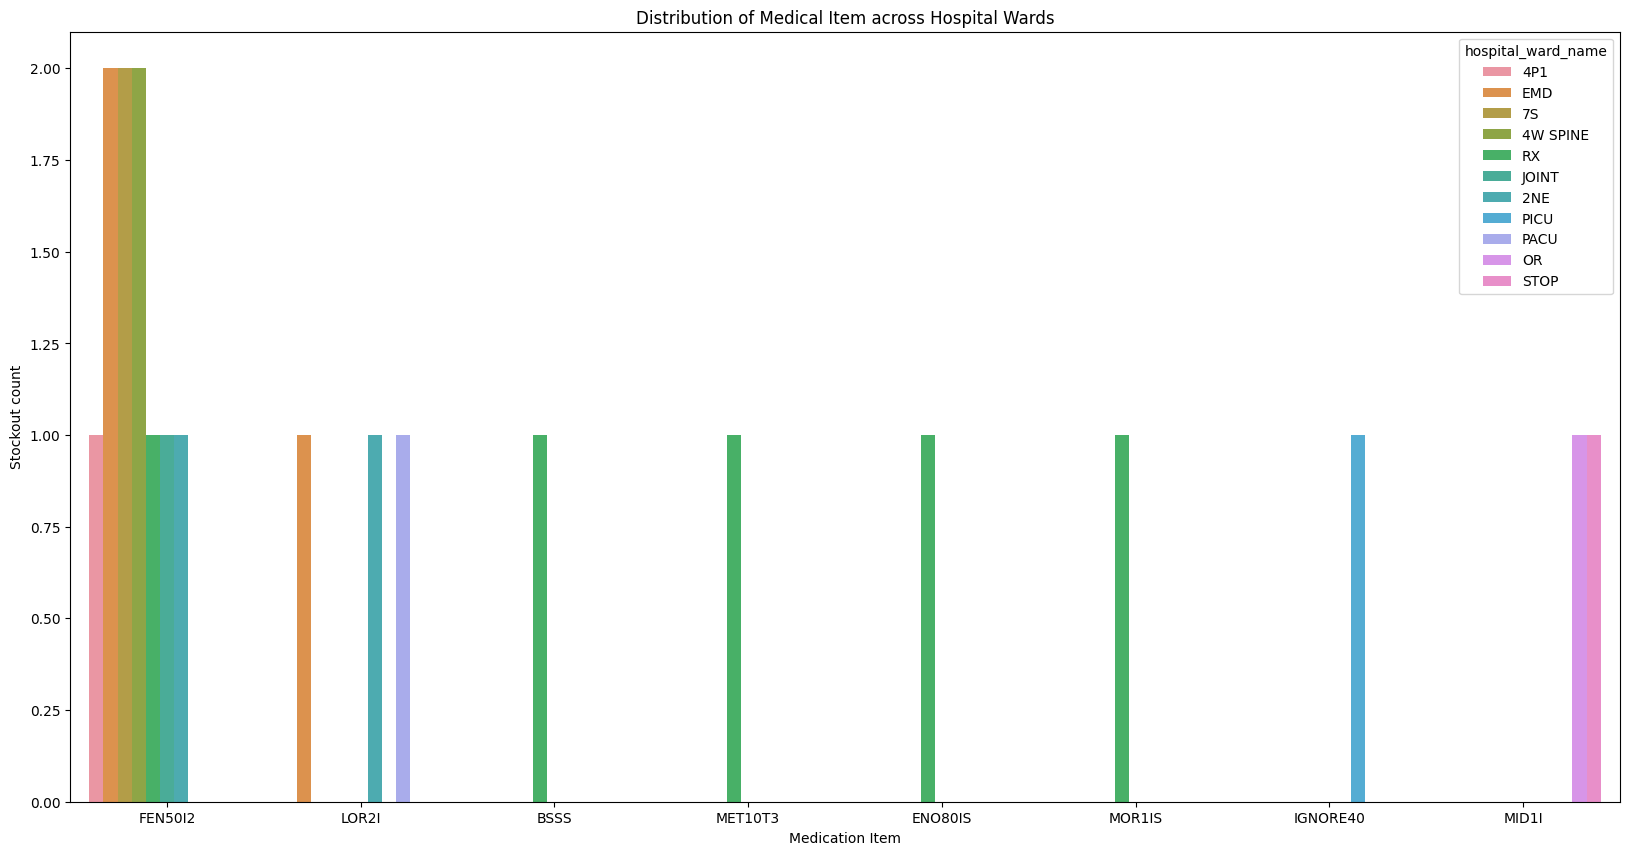

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='medication_detail_id', hue='hospital_ward_name', data=stockout_medical_transaction)
plt.title('Distribution of Medical Item across Hospital Wards')
plt.xlabel('Medication Item')
plt.ylabel('Stockout count')
plt.show()

#FEN50I2 is the item which has highest stockout rate and it is stockout in wards 4P1,EMD,7S,4W SPINE,RX,JOINT,and 2ZNE

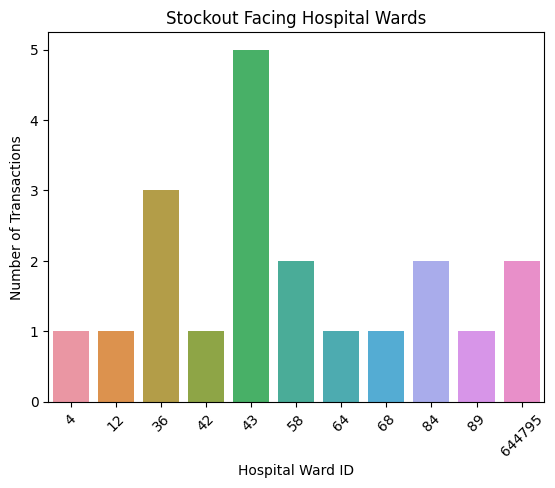

In [ ]:
sns.countplot(x="hospital_ward_id", data=stockout_medical_transaction) #Stockout at largest is happening at hospital ward 43
plt.title('Stockout Facing Hospital Wards')
plt.xlabel('Hospital Ward ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

#Ward 43 has the most stockout items

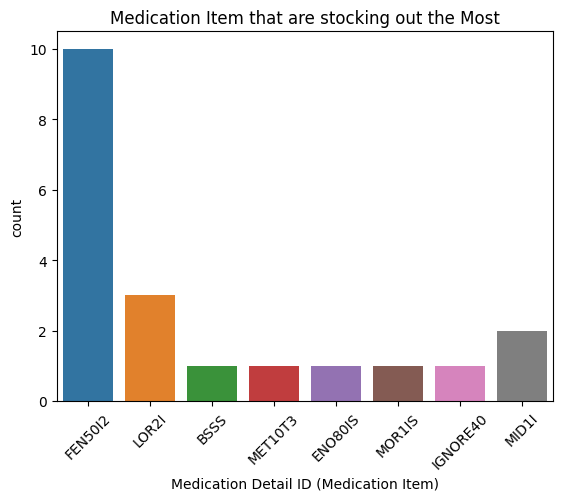

In [ ]:
sns.countplot(x="medication_detail_id", data=stockout_medical_transaction) #most stockout item amoung stockout item is FEN50I2
plt.xlabel('Medication Detail ID (Medication Item)')
plt.xticks(rotation=45)
plt.title('Medication Item that are stocking out the Most')
plt.show()


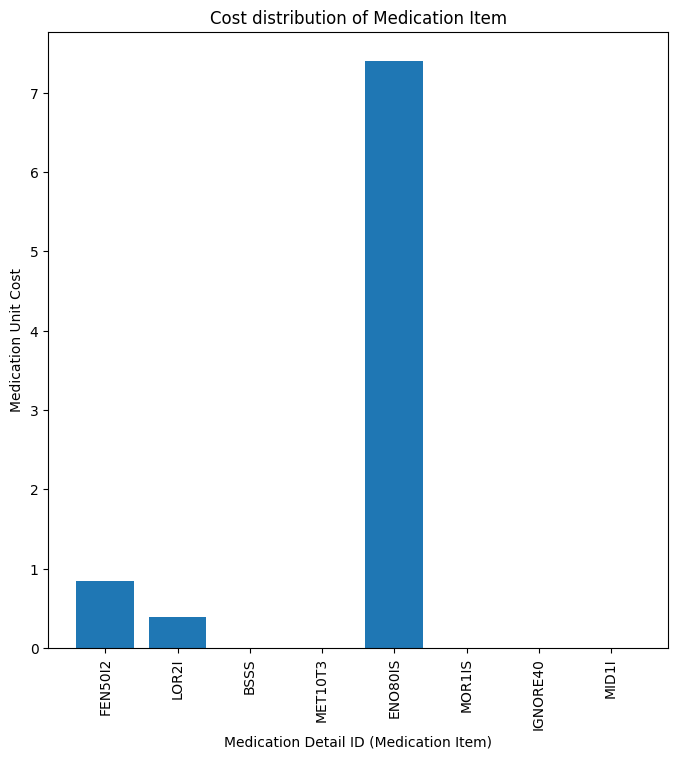

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(stockout_medical_transaction['medication_detail_id'], stockout_medical_transaction['medication_unit_cost'])
plt.xlabel('Medication Detail ID (Medication Item)')
plt.ylabel('Medication Unit Cost')
plt.title('Cost distribution of Medication Item')
plt.xticks(rotation=90)
plt.show()

#most expensive among stockout item is ENO80IS

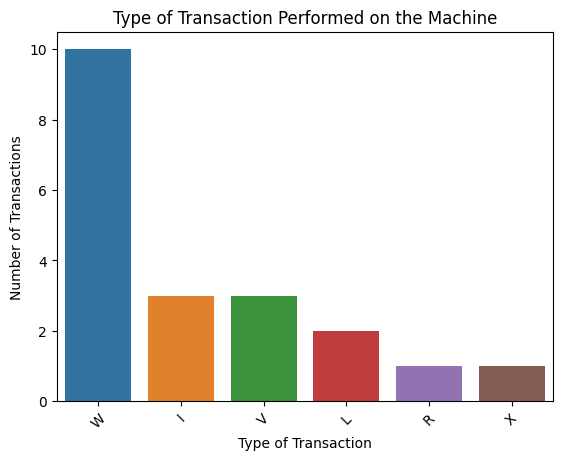

W    10
I     3
V     3
L     2
R     1
X     1
Name: transaction_type, dtype: int64


In [ ]:
sns.countplot(x="transaction_type", data=stockout_medical_transaction)
plt.title('Type of Transaction Performed on the Machine')
plt.xlabel('Type of Transaction')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()
print(stockout_medical_transaction['transaction_type'].value_counts())
#Most of the items are wastage